# imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# maybe a timer too eventually

# Chapter 1: Introduction

Basically, a differential equation 

$
Lu = f(xu)
$

can be solved by letting

$
u = u_N(x) = \sum_{n=0}^N a_n \phi_n(x)
$

where $\phi_n(x)$ are basis functions.

Then, we solve the problem by **minimizing the residual** $R := Lu_N - f(x,u)$
which is evaluated at certain **collocation nodes* ${x_i}$

$R(x_i,u_2)=0$ is a system of linear (or nonlinear, if ODE/PDE is nonlinear) equations
 - if $N_{collocation} = N_{coefficients}$, can simply **invert** the system
   - if $L$ is a linear operator, then this is like $A\mathbf{x}=\mathbf{b}$ where $\mathbf{x}={a_n}$ are your basis coefficients, $\mathbf{b}$ is your function $f(x,u)$
   - if $L$ a nonlinear operator, then this is no longer a simple matrix problem because now terms like $u^2$ may appear which means you will have terms like $a_i^2$ once you
     plug back in the expanded function into the differential equation, so you can no longer write it out as $A\mathbf{x}=\mathbf{b}$
 - else if $N_{collocation} > N_{coefficients}$, can do a **pseudoinverse** (or Newton method) to find the coefficients that minimize $R$ in a least-squares sense
 

## 1.2 First Example
Linear 1D BVP

$
u_{xx} - (x^6 + 3x^2)u = 0
$

$
u(-1)=u(1)=1
$

with exact solution

$
u(x) = exp([x^4-1]/4)
$

Procedure:

 - Pick what spectral basis to use
   - we'll choose a polynomial approximation with 3 DOF, of a form s.t. the BCs are satisfied:
   
   $
   u_2(x) = 1+ (1-x^2)(a_0 + a_1x + a_2x^2)
   $
   
     where  BC are taken care of by first term basically
 - define Residual function as (basically plug $u=u_2$ into original diff eq)
 
 $
 R(x;a_0,a_1,a_2) = u_{2,xx} - (x^6 + 3x^2)u_2
 $
 
 - Choose collocation points to satisfy R=0 at (we need 3 if we want to exactly solve as we have 3 DOF)

x_i = {-1/2,0,1/2)


 - Solve $R(x_i;a_0,a_1,a_2)=0$ for $a_0,a_1,a_2$, this is a linear eqn so can exactly solve it


In [2]:
import sympy as sym
a0 = sym.Symbol('a0')
a1 = sym.Symbol('a1')
a2 = sym.Symbol('a2')

def u2(x,a0,a1,a2):
    return 1+ (1-x**2)*(a0 + a1*x + a2*x**2)
def R(x,a0,a1,a2):
    return -2*(a0+3*a1*x+a2*(6*x**2-1)) - (x**6 + 3*x**2)*u2(x,a0,a1,a2)


In [10]:
soln=sym.solve((R(-1/2,a0,a1,a2),R(0,a0,a1,a2),R(1/2,a0,a1,a2)),(a0,a1,a2))

In [21]:
keys=list(soln.keys())

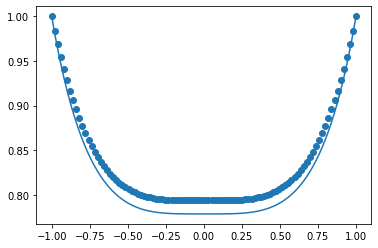

In [22]:
plt.figure()
x=np.linspace(-1,1,100)
plt.plot(x,np.exp((x**4-1)/4),label='exact')
plt.scatter(x,u2(x,soln[keys[0]],soln[keys[1]],soln[keys[2]]))
plt.legend
plt.show()